<a href="https://colab.research.google.com/github/DIVYAAZZ/SCT_DS_4--/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cleaned.csv to cleaned (1).csv
Saving RTA Dataset.csv to RTA Dataset (1).csv
{'cleaned (1).csv': b'Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity\r\n18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2\r\n31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2\r\n18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1\r\n18-30,Male,Junior high school,Employee,5-10yr,other,Y

/tmp/ipython-input-3-2021090251.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rta_df['Hour'] = pd.to_datetime(rta_df['Time'], errors='coerce').dt.hour


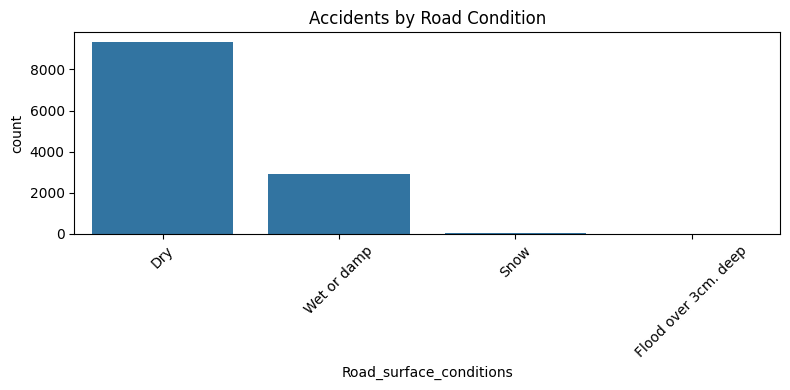

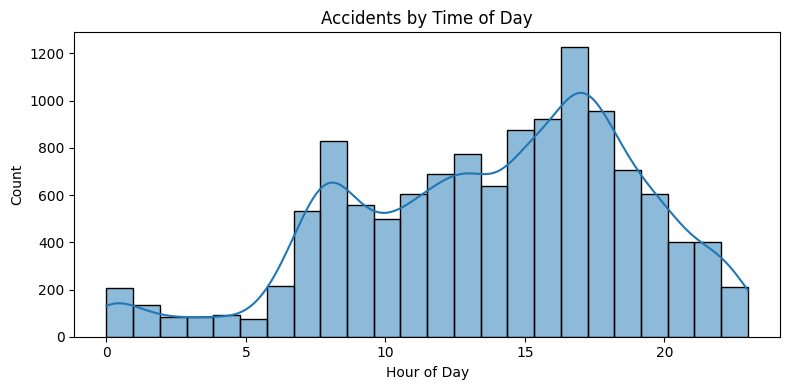

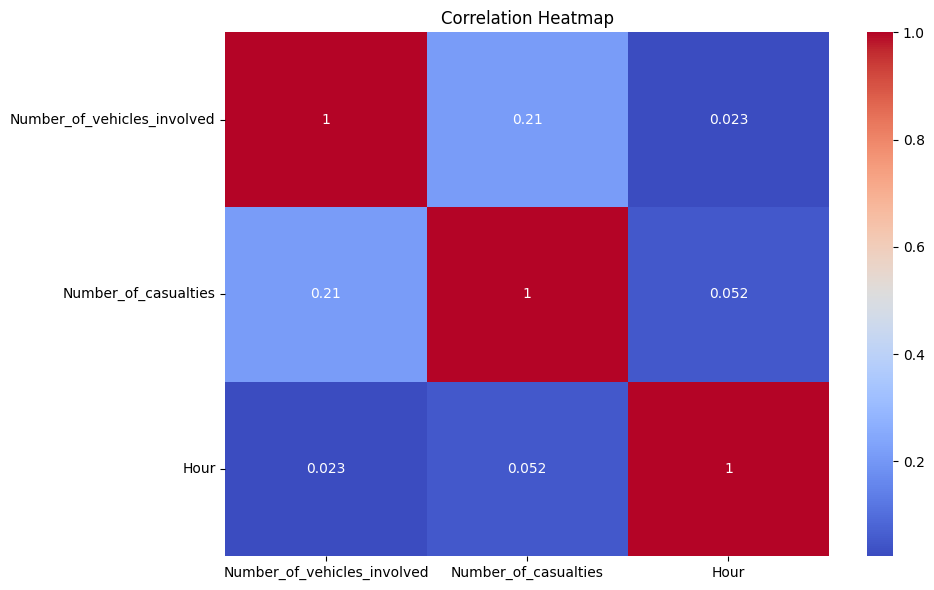

In [3]:
from google.colab import files
uploaded = files.upload()
print(uploaded)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rta_df = pd.read_csv("RTA Dataset.csv")
cleaned_df = pd.read_csv("cleaned.csv")

print("RTA Dataset Shape:", rta_df.shape)
print("Cleaned Dataset Shape:", cleaned_df.shape)

if 'Time' in rta_df.columns:
    rta_df['Hour'] = pd.to_datetime(rta_df['Time'], errors='coerce').dt.hour

if 'Weather_condition' in rta_df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=rta_df, x='Weather_condition', order=rta_df['Weather_condition'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title("Accidents by Weather Condition")
    plt.tight_layout()
    plt.show()

if 'Road_surface_conditions' in rta_df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=rta_df, x='Road_surface_conditions', order=rta_df['Road_surface_conditions'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title("Accidents by Road Condition")
    plt.tight_layout()
    plt.show()

if 'Hour' in rta_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(rta_df['Hour'].dropna(), bins=24, kde=True)
    plt.title("Accidents by Time of Day")
    plt.xlabel("Hour of Day")
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(rta_df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
